<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0606/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# 整理資料/資料預處理
# pandas兩個型態: DataFrame(表格, 2D)/Series(一行/一列, 1D)
# 資料的量到底要多少才夠?
# 看你的問題的難易度來決定(簡單: 少一點 難: 多一點) 欄位數量(少: 簡單 多: 難)
# ML: 千-萬  DL: 萬-十萬
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["ans"] = iris["target"]
# df.to_csv("iris.csv", encoding="utf-8", index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [35]:
# 切成兩份
# 資料整理/預處理: pandas 機器學習: numpy
import numpy as np
# 型態: numpy array
x = np.array(df.drop(["ans"], axis=1))
y = np.array(df["ans"])

In [36]:
# 大部分人會9:1/8:2切
from sklearn.model_selection import train_test_split
# [90%x, 10%x, 90%y, 10%y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

[Text(0.5, 0.9, 'petal length (cm) <= 2.45\ngini = 0.665\nsamples = 135\nvalue = [42, 44, 49]\nclass = virginica'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.7, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 93\nvalue = [0, 44, 49]\nclass = virginica'),
 Text(0.3076923076923077, 0.5, 'petal length (cm) <= 4.95\ngini = 0.187\nsamples = 48\nvalue = [0, 43, 5]\nclass = versicolor'),
 Text(0.15384615384615385, 0.3, 'petal width (cm) <= 1.65\ngini = 0.045\nsamples = 43\nvalue = [0, 42, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.3, 'petal width (cm) <= 1.65\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = virginica'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]\nc

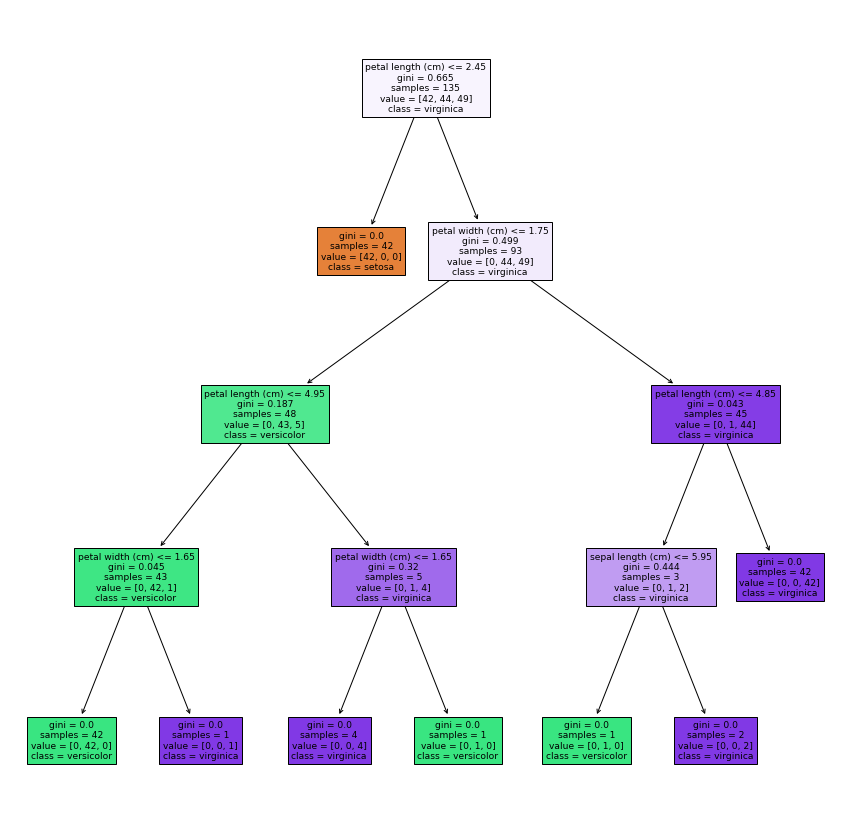

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))
plot_tree(clf, 
     feature_names=iris["feature_names"],
     class_names=iris["target_names"],
     filled=True)